# Creating a model which can predict a given person information have heart disease or not ;)

#Data WE Got is From kaggle heart disease dataset

#lets see this proof of concept will worth it or not by checking thier prediction accuracy

#lets know about their features 
* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* e slope of the peak exercise ST segment
* mber of major vessels (0-3) colored by flourosopy
* al: 0 = normal; 1 = fixed defect; 2 = reversable defect
* e names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [1]:
#let import all the library we needed 

#for eda = (exploratory data analysis) and plotting libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sea

#Models from scikit-learn
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#for preprocessing 
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,train_test_split,cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report,f1_score,precision_score,recall_score,confusion_matrix,plot_roc_curve


# Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
#lets get a insight on our data 
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

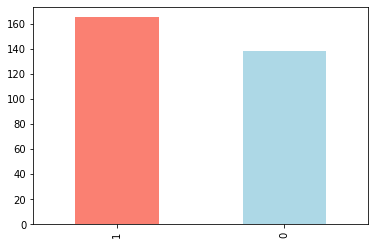

In [5]:
df["target"].value_counts().plot.bar(color=["salmon","lightblue"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93


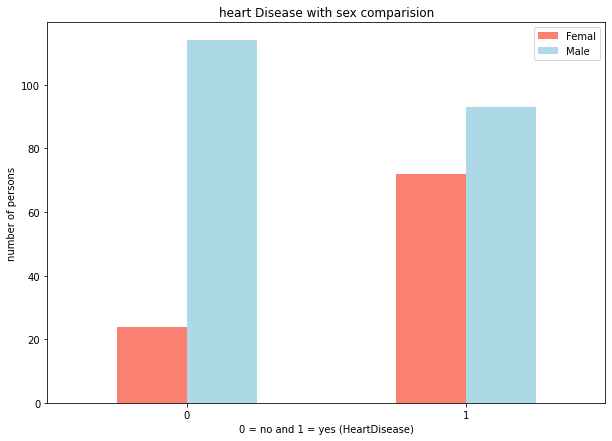

In [11]:
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,7),
                                  color = ["salmon","lightblue"])
plt.title("heart Disease with sex comparision")
plt.xlabel("0 = no and 1 = yes (HeartDisease)")
plt.ylabel("number of persons")
plt.legend(["Femal","Male"])
plt.xticks(rotation=0);

<AxesSubplot:ylabel='Frequency'>

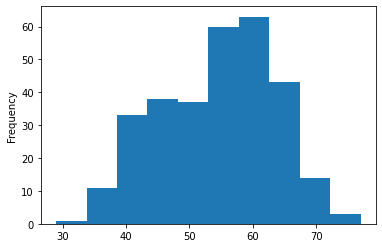

In [12]:
df.age.plot.hist() # it in a normal distribution , if we had a weird results its becoz of the outliers which in this case low age 0...30 and higher age 80.... 

In [13]:
df.age.info

<bound method Series.info of 0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: int64>

In [14]:
df.thalach.info

<bound method Series.info of 0      150
1      187
2      172
3      178
4      163
      ... 
298    123
299    132
300    141
301    115
302    174
Name: thalach, Length: 303, dtype: int64>

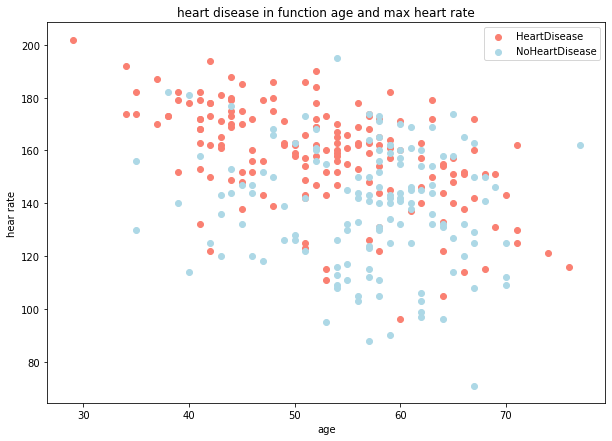

In [15]:
plt.figure(figsize=(10,7))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="salmon")
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="lightblue")
plt.title("heart disease in function age and max heart rate")
plt.xlabel("age")
plt.ylabel("hear rate")
plt.legend(["HeartDisease","NoHeartDisease"])


In [16]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [17]:
df.cp.info

<bound method Series.info of 0      3
1      2
2      1
3      1
4      0
      ..
298    0
299    3
300    0
301    0
302    1
Name: cp, Length: 303, dtype: int64>

<AxesSubplot:>

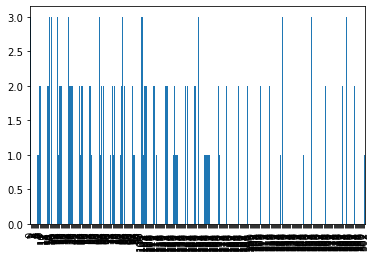

In [18]:
df.cp.plot.bar()

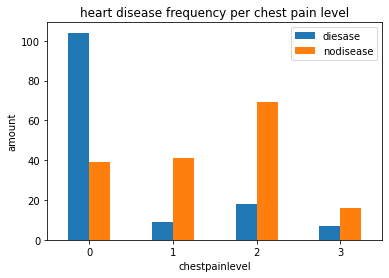

In [19]:
pd.crosstab(df.cp,df.target).plot(kind="bar")
plt.title("heart disease frequency per chest pain level")
plt.xlabel("chestpainlevel")
plt.ylabel("amount")
plt.legend(["diesase","nodisease"])
plt.xticks(rotation=0);

In [20]:
#Correlation between independent variable vs dependant variable
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


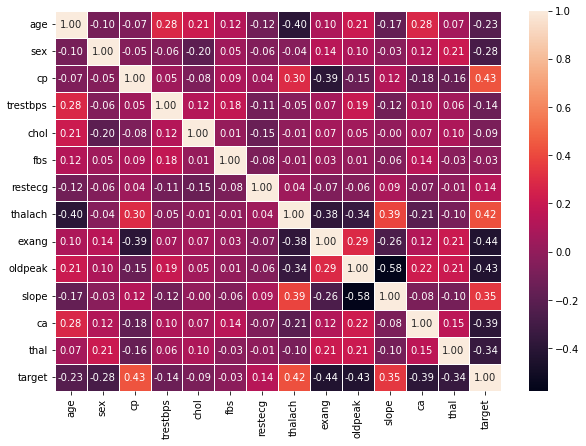

In [21]:
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(10,7))
ax = sea.heatmap(corr_matrix,
                annot=True,
                fmt=".2f",
                linewidth=0.5)

# lets model 

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
x = df.drop("target",axis=1)
y = df["target"]
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
len(x_train),len(x_test),len(y_train),len(y_test)

(242, 61, 242, 61)

In [25]:
#creating a function to train and evaluate on our data 
models = {"Logistical Regression":LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "Random Forest":RandomForestClassifier()}
def fit_and_train(models,x_train,y_train,x_test,y_test):
    model_score ={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_score[name] = model.score(x_test,y_test)
    return model_score

In [26]:
model_scores =fit_and_train(models,x_train,y_train,x_test,y_test)
model_scores

C:\Users\sriram\Desktop\hd_project\.env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistical Regression': 0.819672131147541,
 'KNN': 0.6229508196721312,
 'Random Forest': 0.8360655737704918}

<AxesSubplot:>

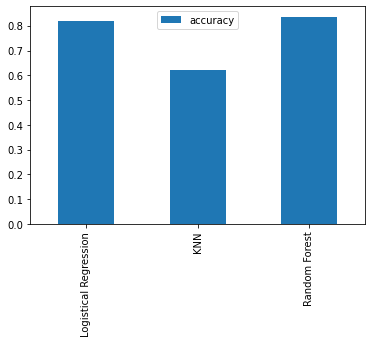

In [27]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar()

# lets hyper tune our knn model

In [28]:
values = np.arange(1,21)
values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [29]:
test_scores = []
train_scores = []
knn = KNeighborsClassifier()
for i in values:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

the maximum score is 72.13%


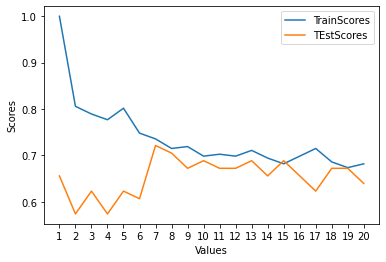

In [30]:
plt.plot(values,train_scores,label="TrainScores")
plt.plot(values,test_scores,label="TEstScores")
plt.xlabel("Values")
plt.ylabel("Scores")
plt.legend()
plt.xticks(np.arange(1,21))
print(f"the maximum score is {max(test_scores)*100:.2f}%")

# Lets Create Hyperparameter Search Cv

In [31]:
log_red_grid = {"C":np.logspace(-4,4,20),
               "solver":["liblinear"]}
rf_grid = {"n_estimators":np.arange(10,1000,50),
          "max_depth":[None,3,5,4,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}

In [32]:
rs_log = RandomizedSearchCV(LogisticRegression(),param_distributions=log_red_grid,cv=5,n_iter=20,verbose=True)
rs_log.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [33]:
rs_log.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [34]:
rs_log.score(x_test,y_test)

0.8360655737704918

In [35]:
r_f_c = RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True)
r_f_c.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 4, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [36]:
r_f_c.best_params_

{'n_estimators': 860,
 'min_samples_split': 18,
 'min_samples_leaf': 19,
 'max_depth': None}

In [37]:
r_f_c.score(x_test,y_test)

0.8360655737704918

# Grid Search

In [38]:
l_g_s = GridSearchCV(LogisticRegression(),
                    param_grid=log_red_grid,
                    verbose=True,
                    cv=5)
l_g_s.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [39]:
l_g_s.score(x_test,y_test)

0.8360655737704918

In [40]:
l_g_s.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

# Roc curve

In [41]:
l_g_s.fit(x_train.values,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [42]:
y_pred = l_g_s.predict(x_test)
len(y_pred),len(y_test)

C:\Users\sriram\Desktop\hd_project\.env\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


(61, 61)

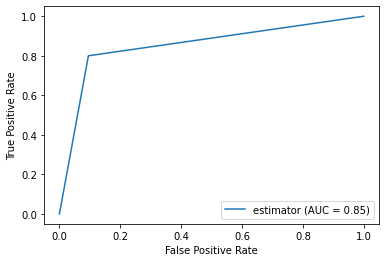

In [43]:
%matplotlib inline
from sklearn.metrics import roc_curve,RocCurveDisplay,roc_auc_score
fpr,tpr,threshold = roc_curve(y_pred,y_test)
score = roc_auc_score(y_pred,y_test)
display = RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc = score,estimator_name="estimator")
display.plot()

C:\Users\sriram\Desktop\hd_project\.env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\sriram\Desktop\hd_project\.env\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


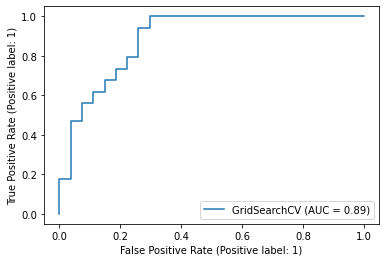

In [44]:
plot_roc_curve(l_g_s,x_test,y_test)

In [45]:
confusion_matrix(y_test,y_pred)

array([[19,  8],
       [ 2, 32]], dtype=int64)

In [46]:
sea.set(font_scale=1.5)
def plot_conf_mat(y_test,y_pred):
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sea.heatmap(confusion_matrix(y_test,y_pred),
                annot=True,
                    cbar=False)
    plt.xlabel("TrueLabel")
    plt.ylabel("PredLabel")

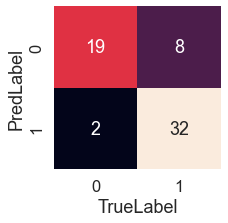

In [47]:
plot_conf_mat(y_test,y_pred)

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79        27
           1       0.80      0.94      0.86        34

    accuracy                           0.84        61
   macro avg       0.85      0.82      0.83        61
weighted avg       0.85      0.84      0.83        61



# Cross Validation Metrics 

In [78]:
def make_cross_validation(model,x,y,scores):
    accuracy = []
    f1 = []
    precision=[]
    recall=[]
    for score in scores:
        c_v = cross_val_score(model,x,y,scoring=score,verbose=False)
        mean = np.mean(c_v)
        if(score=="accuracy"):
            accuracy.append(mean)
        elif (score=="f1"):
            f1.append(mean)
        elif (score=="precision"):
            precision.append(mean)
        else:
            recall.append(mean)
            
    df = pd.DataFrame({"Accuracy":accuracy,
                      "f1":f1,
                      "precision":precision,
                     "recall":recall})
    df.T.plot.bar(title="cross_validation_metrics",legend=False)
            
    return accuracy,f1,precision,recall

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 

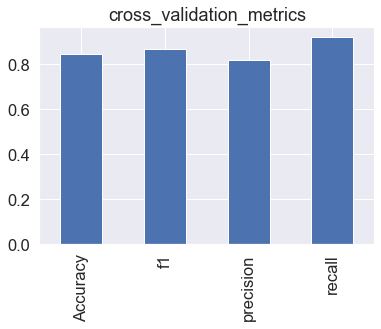

In [79]:
scores = ["accuracy","f1","precision","recall"]
make_cross_validation(l_g_s,x,y,scores);

In [81]:
l_g_s.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [82]:
clf = LogisticRegression(C=0.23357214690901212,
                        solver="liblinear")
clf.fit(x_train,y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [83]:
clf.coef_

array([[ 0.01082016, -0.86712723,  0.75863024, -0.0148032 , -0.00141893,
         0.1450584 ,  0.44384346,  0.02556922, -0.53575586, -0.49261113,
         0.38180588, -0.56836676, -0.80367915]])

In [85]:
df.head(),df.columns

(   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   63    1   3       145   233    1        0      150      0      2.3      0   
 1   37    1   2       130   250    0        1      187      0      3.5      0   
 2   41    0   1       130   204    0        0      172      0      1.4      2   
 3   56    1   1       120   236    0        1      178      0      0.8      2   
 4   57    0   0       120   354    0        1      163      1      0.6      2   
 
    ca  thal  target  
 0   0     1       1  
 1   0     2       1  
 2   0     2       1  
 3   0     2       1  
 4   0     2       1  ,
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
        'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
       dtype='object'))

In [86]:
co_dict = dict(zip(df.columns,clf.coef_[0])) 
co_dict

{'age': 0.01082016152704004,
 'sex': -0.8671272298155296,
 'cp': 0.7586302372480955,
 'trestbps': -0.014803203306327553,
 'chol': -0.0014189334711528967,
 'fbs': 0.14505840294648428,
 'restecg': 0.44384346192276636,
 'thalach': 0.025569224972636872,
 'exang': -0.5357558580034338,
 'oldpeak': -0.4926111337455939,
 'slope': 0.38180588211258715,
 'ca': -0.568366758725129,
 'thal': -0.8036791459334219}

<AxesSubplot:title={'center':'CoEfficient(feature importance)'}>

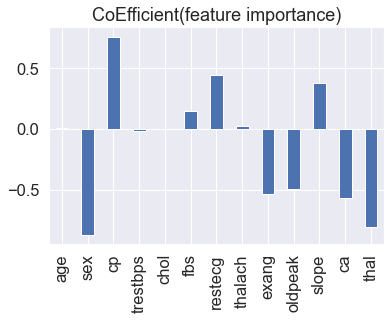

In [91]:
co_df = pd.DataFrame(co_dict,index=[0])
co_df.T.plot.bar(title="CoEfficient(feature importance)",
                legend=False)

In [92]:
pd.crosstab(df.sex,df.target)#when sex increases my target value is decreases (which in terms it doesn't help that much to our modle)

target,0,1
sex,,
0,24,72
1,114,93


In [93]:
pd.crosstab(df.cp,df.target)#when cp increses() my target value increases 

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16
